In [1]:
import numpy as np 
import pandas as pd 
import os
from google.cloud import bigquery
from learntools.core import binder
binder.bind(globals())
from learntools.sql.ex5 import *
print("Setup Complete")

Using Kaggle's public dataset BigQuery integration.
Setup Complete


In [2]:
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


In [3]:
dataset_ref = client.dataset("crypto_bitcoin",project='bigquery-public-data')
 

In [4]:
dataset = client.get_dataset(dataset_ref)

In [5]:
table_ref = dataset_ref.table("transactions")
table = client.get_table(table_ref)
df=client.list_rows(table, max_results=1000).to_dataframe()

In [6]:
df.head()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,f5d9499fb93c104c30f2f0a6055787c4e788b0fec8be89...,512,512,1,0,000000000000000160f3b852402569f6a1f1b38cd1a35a...,273029,2013-12-04 13:32:16+00:00,2013-12-01,2,6,978848094,978798000,False,50094,"[{'index': 0, 'spent_transaction_hash': '0608f...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,de43728cb2982ab848938d061f55d522e15fe79bb5c3ab...,512,512,1,0,00000000000000003a1260f6a07fa8a9f66bbc89972641...,273014,2013-12-04 11:08:18+00:00,2013-12-01,2,6,633984346,633934346,False,50000,"[{'index': 0, 'spent_transaction_hash': '10e0e...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
2,b9aaa4ab930570f8af4eda306637b9a96b6a5a8bba0b15...,768,768,1,0,0000000000000003696f88dc5eb21e54f25d94938ad562...,277416,2013-12-28 14:48:01+00:00,2013-12-01,4,1,170617369,170607369,False,10000,"[{'index': 0, 'spent_transaction_hash': '91ded...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,71863169438b978b5cc812261781a333a2a20b03509601...,768,768,1,0,000000000000000356bdf67fc717f56f065935ec29edd0...,272883,2013-12-03 18:47:25+00:00,2013-12-01,4,2,76686838,76586838,False,100000,"[{'index': 0, 'spent_transaction_hash': 'f9b6b...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,eef7f497635bd52bf89393aff898bef8a93dce7058c9ee...,768,768,1,0,000000000000000574f53b20f90356afb560c8e68587f7...,272702,2013-12-02 19:11:15+00:00,2013-12-01,4,4,65856646,65816646,False,40000,"[{'index': 0, 'spent_transaction_hash': '54f5d...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


In [7]:
df.shape

(1000, 17)

In [8]:
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

In [16]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

In [18]:
df_t_d=query_job.to_dataframe()

In [19]:
df_t_d.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


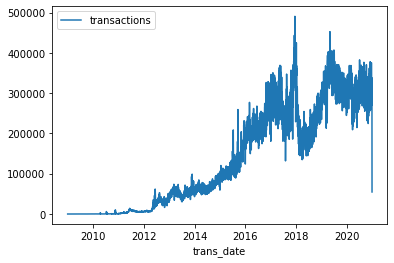

In [20]:
import matplotlib.pyplot as plt
df_t_d.set_index('trans_date').plot()
plt.show()